In [30]:
#Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
# reading a csv file using pandas library
dtst=pd.read_csv("delivery_time1.csv")
dtst
dtst.columns


Index(['DeliveryTime', 'SortingTime'], dtype='object')

In [31]:
dtst.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


{'whiskers': [<matplotlib.lines.Line2D at 0x27da8fd0d30>,
 'caps': [<matplotlib.lines.Line2D at 0x27da8fc7730>,
 'boxes': [<matplotlib.lines.Line2D at 0x27da93f5a00>],
 'medians': [<matplotlib.lines.Line2D at 0x27da8ed3970>],
 'fliers': [<matplotlib.lines.Line2D at 0x27da8fb3280>],
 'means': []}

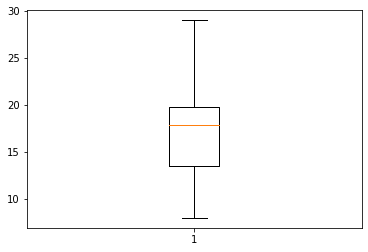

In [32]:
plt.boxplot(dtst.DeliveryTime)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

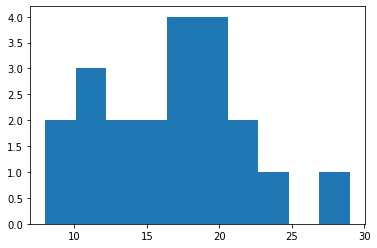

In [33]:
plt.hist(dtst.DeliveryTime)

{'whiskers': [<matplotlib.lines.Line2D at 0x27da95b8910>,
 'caps': [<matplotlib.lines.Line2D at 0x27da95b8fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27da95b85b0>],
 'medians': [<matplotlib.lines.Line2D at 0x27da95c76d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27da95c79d0>],
 'means': []}

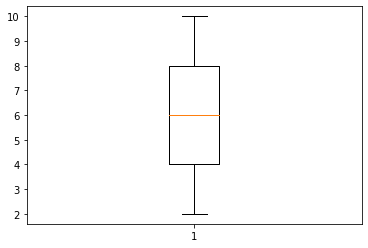

In [34]:
plt.boxplot(dtst.SortingTime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

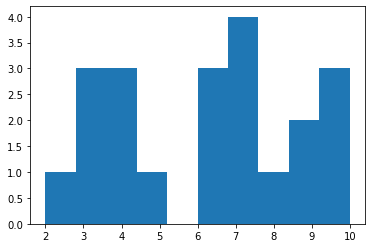

In [35]:
plt.hist(dtst.SortingTime)

Text(0, 0.5, 'SortingTime')

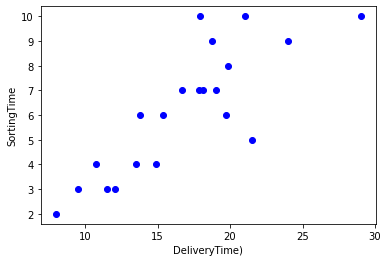

In [37]:
plt.plot(dtst.DeliveryTime,dtst.SortingTime,"bo");plt.xlabel("DeliveryTime)");plt.ylabel("SortingTime")

In [38]:
dtst.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [41]:
dtst.SortingTime.corr(dtst.DeliveryTime)

0.8259972607955325

In [43]:
model=smf.ols("DeliveryTime~SortingTime",data=dtst).fit()

In [45]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           3.98e-06
Time:                        18:17:52   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print(model.conf_int(0.05)) # 95% confidence interval

                    0          1
Intercept    2.979134  10.186334
SortingTime  1.108673   2.189367


In [63]:
pred = model.predict(dtst) # Predicted values of dt using the model
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

Text(0, 0.5, 'DeliveryTime')

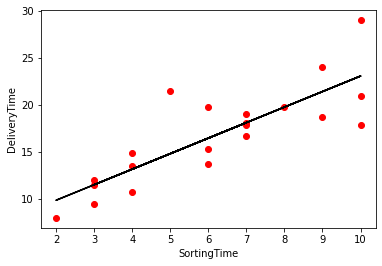

In [64]:
import matplotlib.pylab as plt
plt.scatter(x=dtst['SortingTime'],y=dtst['DeliveryTime'],color='red');plt.plot(dtst['SortingTime'],pred,color='black');plt.xlabel('SortingTime');plt.ylabel('DeliveryTime')

In [50]:
mode2=smf.ols("DeliveryTime~np.log(SortingTime)",data=dtst).fit()  #log transformation
mode2.params
mode2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           2.64e-06
Time:                        18:22:11   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print(mode2.conf_int(0.05))

                           0          1
Intercept           -3.97778   6.297147
np.log(SortingTime)  6.16977  11.917057


In [70]:
pred1 = mode2.predict(dtst) # Predicted values of dt using the model
pred1

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'DeliveryTime')

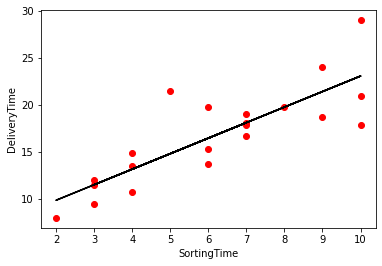

In [67]:
plt.scatter(x=dtst['SortingTime'],y=dtst['DeliveryTime'],color='red');plt.plot(dtst['SortingTime'],pred1,color='black');plt.xlabel('SortingTime');plt.ylabel('DeliveryTime')

In [71]:
mode3 = smf.ols('np.log(DeliveryTime)~SortingTime',data=dtst).fit()
mode3.params
mode3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 23 Oct 2020   Prob (F-statistic):           1.59e-06
Time:                          19:27:42   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
print(mode3.conf_int(0.05))

                    0         1
Intercept    1.905848  2.336896
SortingTime  0.073235  0.137869


In [73]:
pred2 = mode3.predict(dtst) # Predicted values of dt using the model
pred2

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

Text(0, 0.5, 'DeliveryTime')

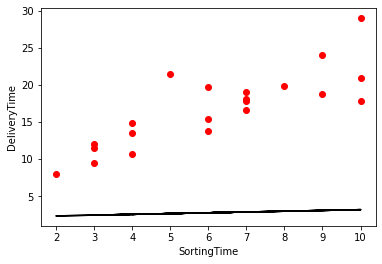

In [74]:
plt.scatter(x=dtst['SortingTime'],y=dtst['DeliveryTime'],color='red');plt.plot(dtst['SortingTime'],pred2,color='black');plt.xlabel('SortingTime');plt.ylabel('DeliveryTime')

In [55]:
dtst["SortingTime_Sq"] = dtst.SortingTime*dtst.SortingTime
model_quad = smf.ols("np.log(DeliveryTime)~SortingTime+SortingTime_Sq",data=dtst).fit()


In [56]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Fri, 23 Oct 2020   Prob (F-statistic):           2.20e-06
Time:                          18:30:37   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print(model_quad.conf_int(0.05))

                       0         1
Intercept       1.219786  2.179623
SortingTime     0.097381  0.434462
SortingTime_Sq -0.026119  0.000438


In [76]:
pred3 = model_quad.predict(dtst) # Predicted values of dt using the model
pred3

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

Text(0, 0.5, 'DeliveryTime')

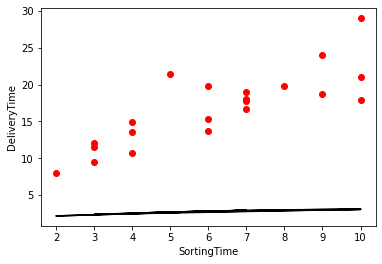

In [77]:
plt.scatter(x=dtst['SortingTime'],y=dtst['DeliveryTime'],color='red');plt.plot(dtst['SortingTime'],pred3,color='black');plt.xlabel('SortingTime');plt.ylabel('DeliveryTime')

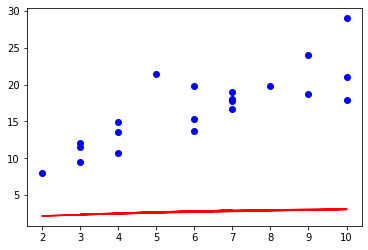

In [78]:
plt.scatter(dtst.SortingTime,dtst.DeliveryTime,c="b");plt.plot(dtst.SortingTime,pred3,"r")

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <a list of 10 Patch objects>)

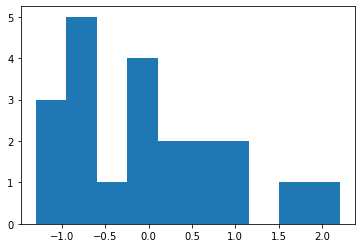

In [79]:
plt.hist(model_quad.resid_pearson)

In [ ]:
#model_quad is gud  than other model and has moderate corelation.